In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-10-15 06:52:41--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-10-15 06:52:41--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-10-15 06:52:41--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... c

In [7]:
def draw_fruits(arr,ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows,cols,figsize=(cols*ratio, rows*ratio),squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i * 10 + j < n:
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
      axs[i,j].axis('off')

  plt.show()

In [3]:
fruits = np.load('fruits_300.npy') # 과일 사진 불러오기
fruits_2d = fruits.reshape(-1,10000) # (300,100,100) 배열을 (300, 10000)으로 형태 변환

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

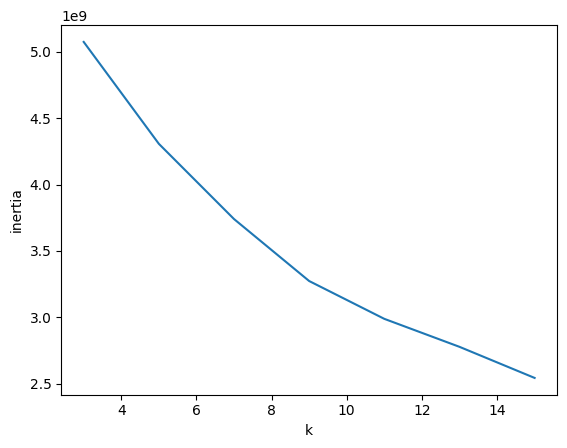

In [4]:
# 군집의 개수가 너무 많을 경우 과적합이 발생하므로 3~16사이로 값의 범위를 설정

inertia = []

for k in range(3,16,2):
  km = KMeans(n_clusters=k, random_state=100)
  km.fit(fruits_2d)
  inertia.append(km.inertia_) # inertia : 클러스터 중심에서 클러스터 내 샘플 사이의 거리의 제곱의 합

plt.plot(range(3,16,2),inertia) # 5, 7, 9, 11, 15에서 그래프가 꺾이는 것을 확인
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [14]:
# 5, 9, 11에서 그래프가 꺾임 -> 11에서 가장 정확하게 분리하였음

km = KMeans(n_clusters=11,random_state = 42) # 군집개수 3개, centroid 1번 초기화를 설정한 KMeans 모델 생성 및 학습
km.fit(fruits_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=11, random_state=42)

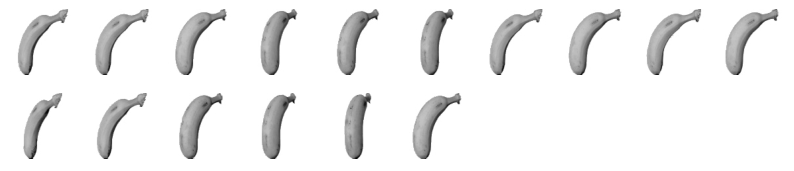

0


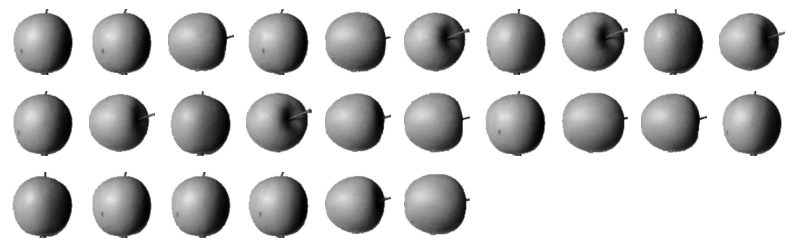

1


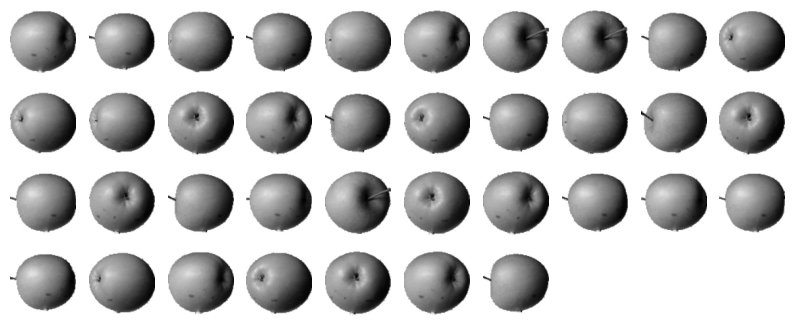

2


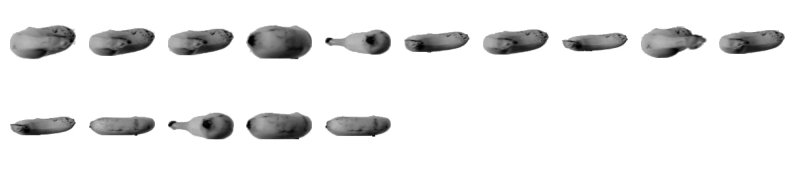

3


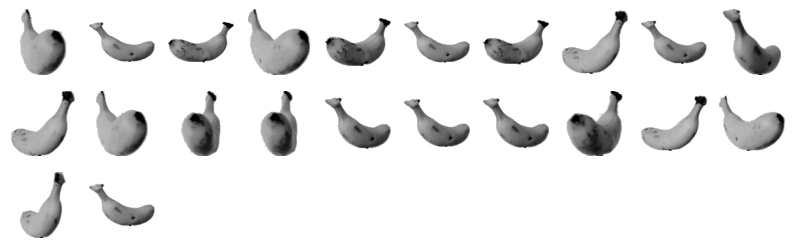

4


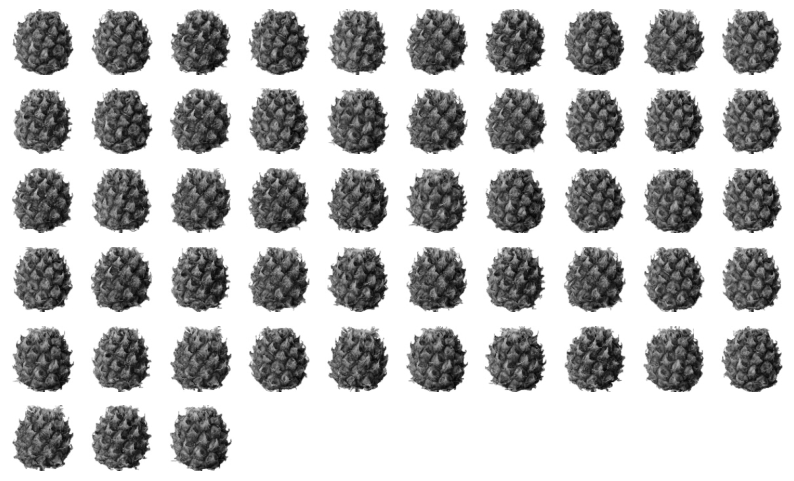

5


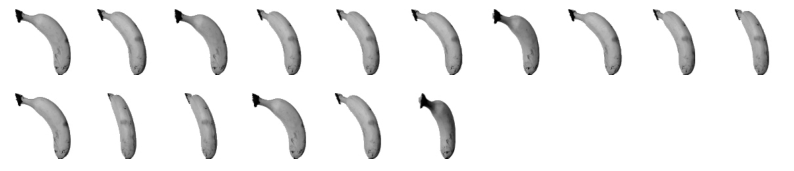

6


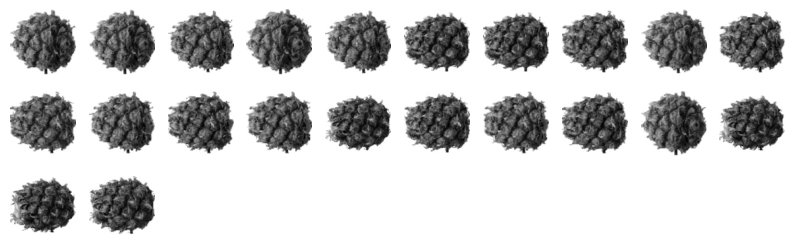

7


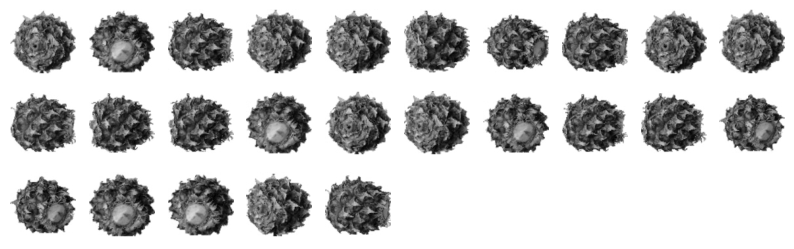

8


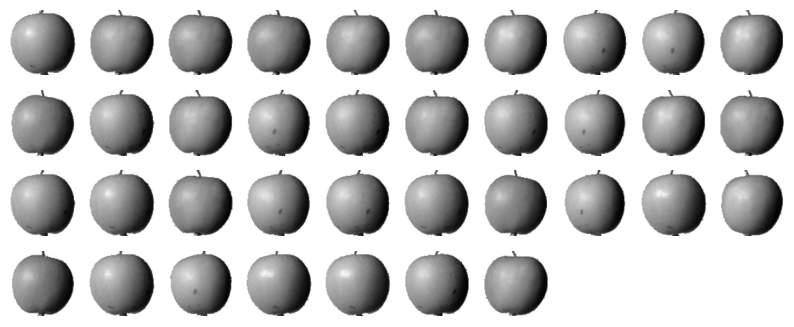

9


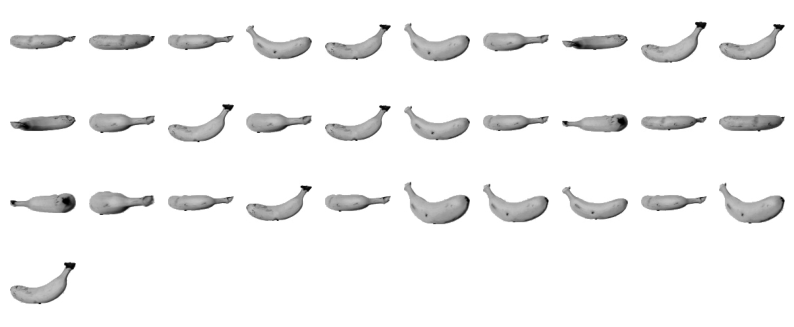

10


In [15]:
for j in range(11):
    draw_fruits(fruits[km.labels_ == j])
    print(j)

In [16]:
# 11개의 클러스터를 다시 3개의 클러스터로 합침
x1 = [0 for i in list(km.labels_) if i in [1, 2, 9]]
x2 = [1 for i in list(km.labels_) if i in [5, 7, 8]]
x3 = [2 for i in list(km.labels_) if i in [0, 3, 4, 6, 10]]

result = x1 + x2 + x3
result = np.array(result)
result.shape

(300,)

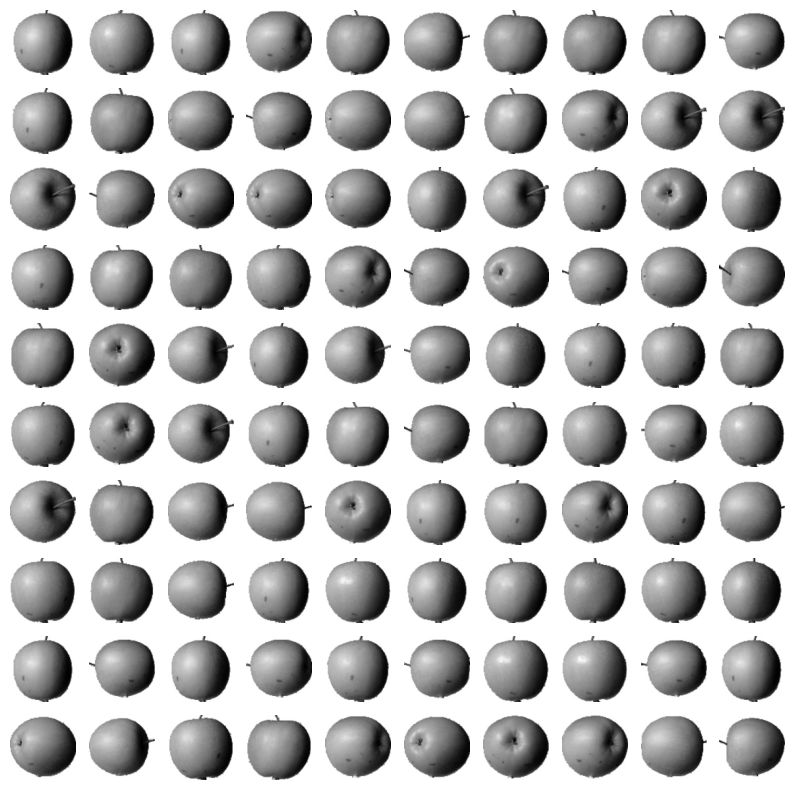

0


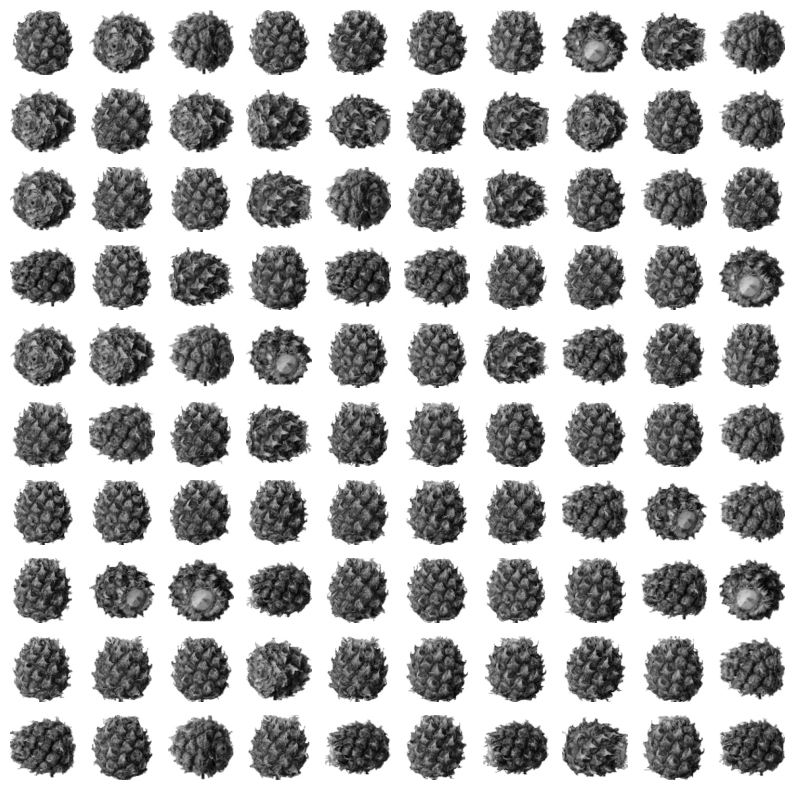

1


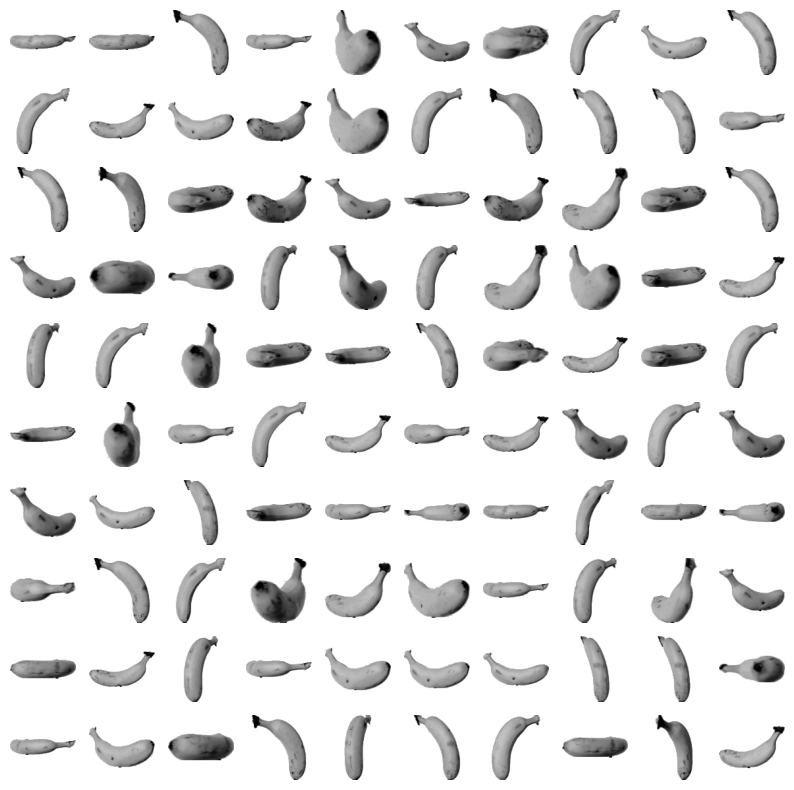

2


In [17]:
for j in range(3):
    draw_fruits(fruits[result == j])
    print(j)